# Decision Tree Regressor from scratch

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
import plotly.graph_objects as go

In [ ]:
class DecisionTreeRegressorFromScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, left, right, feature_index, threshold, value):
            self.left = left
            self.right = right
            self.feature_index = feature_index
            self.threshold = threshold
            self.value = value

    def fit(self, X, Y, depth=0):
        num_samples, num_features = X.shape

        if num_samples <= 1 or (self.max_depth is not None and depth >= self.max_depth):
            leaf_value = np.mean(Y, axis=0)
            return self.Node(None, None, None, None, leaf_value)

        best_mse = float('inf')
        best_split = None

        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                left_indices = feature_values < threshold
                right_indices = feature_values >= threshold
                if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                    continue

                left_Y = Y[left_indices]
                right_Y = Y[right_indices]

                mse_left = np.mean((left_Y - np.mean(left_Y, axis=0))**2)
                mse_right = np.mean((right_Y - np.mean(right_Y, axis=0))**2)
                mse = (mse_left * np.sum(left_indices) + mse_right * np.sum(right_indices)) / num_samples

                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature_index, threshold, left_indices, right_indices)

        if best_split is None:
            return self.Node(None, None, None, None, np.mean(Y, axis=0))

        feature_index, threshold, left_indices, right_indices = best_split
        left_subtree = self.fit(X[left_indices], Y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], Y[right_indices], depth + 1)

        return self.Node(left_subtree, right_subtree, feature_index, threshold, None)

    def predict(self, X):
        return np.array([self._predict(inputs, self.tree) for inputs in X])

    def _predict(self, inputs, node):
        if node.value is not None:
            return node.value
        if inputs[node.feature_index] < node.threshold:
            return self._predict(inputs, node.left)
        else:
            return self._predict(inputs, node.right)




# Cosinus

In [ ]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1, 1)
y = np.cos(X).ravel()


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title('Comparison of cos(x) and Decision Tree Regressor')
line1, = ax.plot([], [], color='blue', label='cos(x)')
line2, = ax.plot([], [], "o", color='red' , label='Predicted cos(x)')
ax.legend()

def init():
    line1.set_data(X, y)
    line2.set_data([], [])
    return line1, line2


def update(max_depth):
    regressor = DecisionTreeRegressorFromScratch(max_depth=max_depth)
    regressor.tree = regressor.fit(X, y)
    y_pred = regressor.predict(X)

    line2.set_data(X, y_pred)
    ax.set_title(f'Comparison at max_depth = {max_depth}')
    return line1, line2


anim = FuncAnimation(fig, update, frames=12, init_func=init, repeat=False, interval=1000)
html = HTML(anim.to_jshtml())
display(html)
plt.close()


# Circle

In [ ]:
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
Y = np.column_stack((np.sin(X.ravel()), np.cos(X.ravel())))

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('sin(x)')
ax.set_ylabel('cos(x)')
ax.set_aspect('equal', adjustable='box')
original = ax.scatter(Y[:, 0], Y[:, 1], color='blue', label='Original circle')
predicted_plot = ax.scatter([], [], color='red', marker='x', label='Predicted circle')
ax.legend()

def update(max_depth):

    tree = DecisionTreeRegressorFromScratch(max_depth=max_depth)
    tree.tree = tree.fit(X, Y)
    predictions = tree.predict(X)

    predicted_plot.set_offsets(predictions)
    ax.set_title(f'Comparison at max_depth = {max_depth}')
    return predicted_plot,

anim = FuncAnimation(fig, update, frames=10, blit=True, interval=1000, repeat=False)
html = HTML(anim.to_jshtml())
display(html)
plt.close()


# 3D

In [ ]:
np.random.seed(42)
theta = np.random.uniform(0, 2 * np.pi, 900)
phi = np.random.uniform(0, np.pi, 900)

X = np.column_stack((theta, phi))
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

Y = np.column_stack((x, y, z))


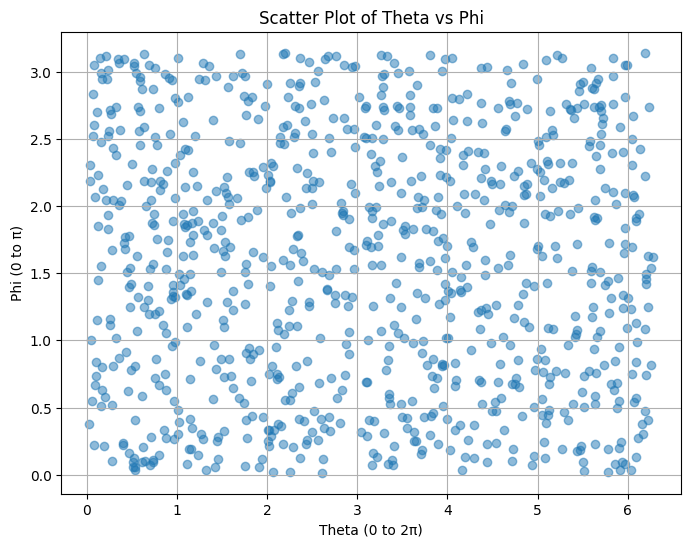

In [ ]:
# 2D scatter plot of the X dataset (theta vs phi)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.title('Scatter Plot of Theta vs Phi')
plt.xlabel('Theta (0 to 2π)')
plt.ylabel('Phi (0 to π)')
plt.grid(True)
plt.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2))])
fig.update_layout(title='Unit Sphere Representation',
                  scene=dict(xaxis=dict(title='X', range=[-1, 1]),
                             yaxis=dict(title='Y', range=[-1, 1]),
                             zaxis=dict(title='Z', range=[-1, 1])))
fig.show()


In [ ]:
fig = go.Figure()
frames = []

for max_depth in range(1, 11):

    tree = DecisionTreeRegressorFromScratch(max_depth=max_depth)
    tree.tree = tree.fit(X, Y)
    predictions = tree.predict(X)

    frame = go.Frame(
        data=[go.Scatter3d(
            x=Y[:, 0], y=Y[:, 1], z=Y[:, 2],
            mode='markers', marker=dict(size=3, color='blue', opacity=0.5),
            name='Actual Sphere'
        ),
        go.Scatter3d(
            x=predictions[:, 0], y=predictions[:, 1], z=predictions[:, 2],
            mode='markers', marker=dict(size=3, color='red', opacity=0.5),
            name=f'Predicted (Depth {max_depth})'
        )],
        name=str(max_depth)
    )

    frames.append(frame)


In [ ]:
layout = go.Layout(
    title_text='Decision Tree Regression on Sphere with Increasing Depth',
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 1000, 'easing': 'quadratic-in-out'}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                },
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }
    ]
)

fig.frames = frames
fig.update_layout(layout)
fig.add_trace(go.Scatter3d(x=Y[:, 0], y=Y[:, 1], z=Y[:, 2],
                           mode='markers', marker=dict(size=3, color='blue', opacity=0.5), name='Actual Sphere'))
fig.add_trace(go.Scatter3d(x=Y[:, 0], y=Y[:, 1], z=Y[:, 2],
                           mode='markers', marker=dict(size=3, color='red', opacity=0.5), name='Predicted Sphere'))

fig.show()

# Pretty onion

In [ ]:
num_points = 30

phi1 = np.linspace(0, np.pi, num_points)
theta1 = np.linspace(0, 2 * np.pi, num_points)

phi1, theta1 = np.meshgrid(phi1, theta1)

X1 = np.arange(1, 901).reshape(-1, 1)
x_sphere = np.sin(phi1) * np.cos(theta1)
y_sphere = np.sin(phi1) * np.sin(theta1)
z_sphere = np.cos(phi1)

Y1 = np.column_stack((x_sphere.flatten(), y_sphere.flatten(), z_sphere.flatten()))

In [ ]:
fig1 = go.Figure()
frames1 = []

for max_depth in range(1, 15):

    tree = DecisionTreeRegressorFromScratch(max_depth=max_depth)
    tree.tree = tree.fit(X1, Y1)

    predictions = tree.predict(X1)

    frame = go.Frame(
        data=[
        go.Surface(
            x=x_sphere, y=y_sphere, z=z_sphere,
            colorscale='blues', opacity=0.5,
            # name='Actual Sphere'
        ),
        go.Scatter3d(
            x=predictions[:, 0], y=predictions[:, 1], z=predictions[:, 2],
            mode='markers', marker=dict(size=3, color='red', opacity=0.5),
            name=f'Predicted (Depth {max_depth})'
        )],
        name=str(max_depth)
    )


    frames1.append(frame)


In [ ]:
layout1 = go.Layout(
    title_text='Decision Tree Regression on Sphere with Increasing Depth',
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [None, {'frame': {'duration': 1000, 'redraw': True}, 'fromcurrent': True, 'transition': {'duration': 1000, 'easing': 'quadratic-in-out'}}],
                    'label': 'Play',
                    'method': 'animate'
                },
                {
                    'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}],
                    'label': 'Pause',
                    'method': 'animate'
                },
            ],
            'direction': 'left',
            'pad': {'r': 10, 't': 87},
            'showactive': False,
            'type': 'buttons',
            'x': 0.1,
            'xanchor': 'right',
            'y': 0,
            'yanchor': 'top'
        }
    ]
)

fig1.frames = frames1

fig1.update_layout(layout1)


fig1.add_trace(go.Surface(x=x_sphere, y=y_sphere, z=z_sphere, colorscale='blues', opacity=0.6, name='Sphere'))
fig1.add_trace(go.Scatter3d(x=Y1[:, 0], y=Y1[:, 1], z=Y1[:, 2],
                           mode='markers', marker=dict(size=3, color='red', opacity=0.5), name='Predicted (Initial)'))

fig1.show()